In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Matriz de confusion',cmap=plt.cm.Blues,ylabel="Resultado real",xlabel="Resultados de la predicion"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusion normalizada ")
    else:
        print('Matriz de confunsio no normalizada')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    # para entregar el % de la matriz de confucion
    diagonal_index= 0
    total=0
    diagonal_total=0
    error_clasificacion_total=0
    for x in cm:
        index=0
        for y in x:
            if(diagonal_index==index):
                diagonal_total=diagonal_total+y
            else:
                error_clasificacion_total=error_clasificacion_total+y
            total=total+y
            index=index+1
        diagonal_index=diagonal_index+1
    acuaracy =  diagonal_total/total
    error_clasificacion=error_clasificacion_total/total
    print("Porcentaje total de los aciertos ")
    print (acuaracy)
    return acuaracy,error_clasificacion

<hr>

In [3]:
f = open('../final.csv','r')
final = pd.read_csv(f)
final.drop('Unnamed: 0', axis=1, inplace=True)
final.drop('Sales', axis=1, inplace=True)

In [4]:
predictors = final[["StoreType","Assortment","CompetitionDistance_int","Customers","Open_int"]] 
targets = final.Sales_rango

In [5]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.1)

In [6]:
temporal_y = tar_train.values
temporal_x = pred_train.values

In [7]:
labels=[0,1,2,3]
labels_string=["malo","regular","bueno","execlente"]

<hr><h1>Arboles de deciones </h1><hr>

In [86]:
clf = DecisionTreeClassifier( max_depth=3) #criterion='entropy'
clf = clf.fit(temporal_x, temporal_y)

Matriz de confunsio no normalizada
[[20764  4087   285    52]
 [  429 14533  9296  1427]
 [    1  4214 11933  9227]
 [    1   264  4202 21006]]


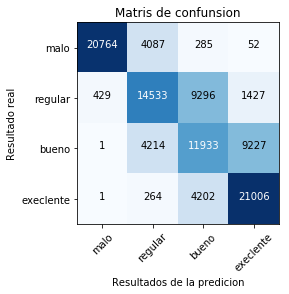

Porcentaje total de los aciertos 
0.670815269217


(0.67081526921677925, 0.32918473078322075)

In [87]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matriz de confunsion')


In [88]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names=predictors.keys(),filled=True,rounded=True
                ,proportion=True,class_names=labels_string)

In [89]:
from PIL import Image
i = Image.open('tree.png','r') 

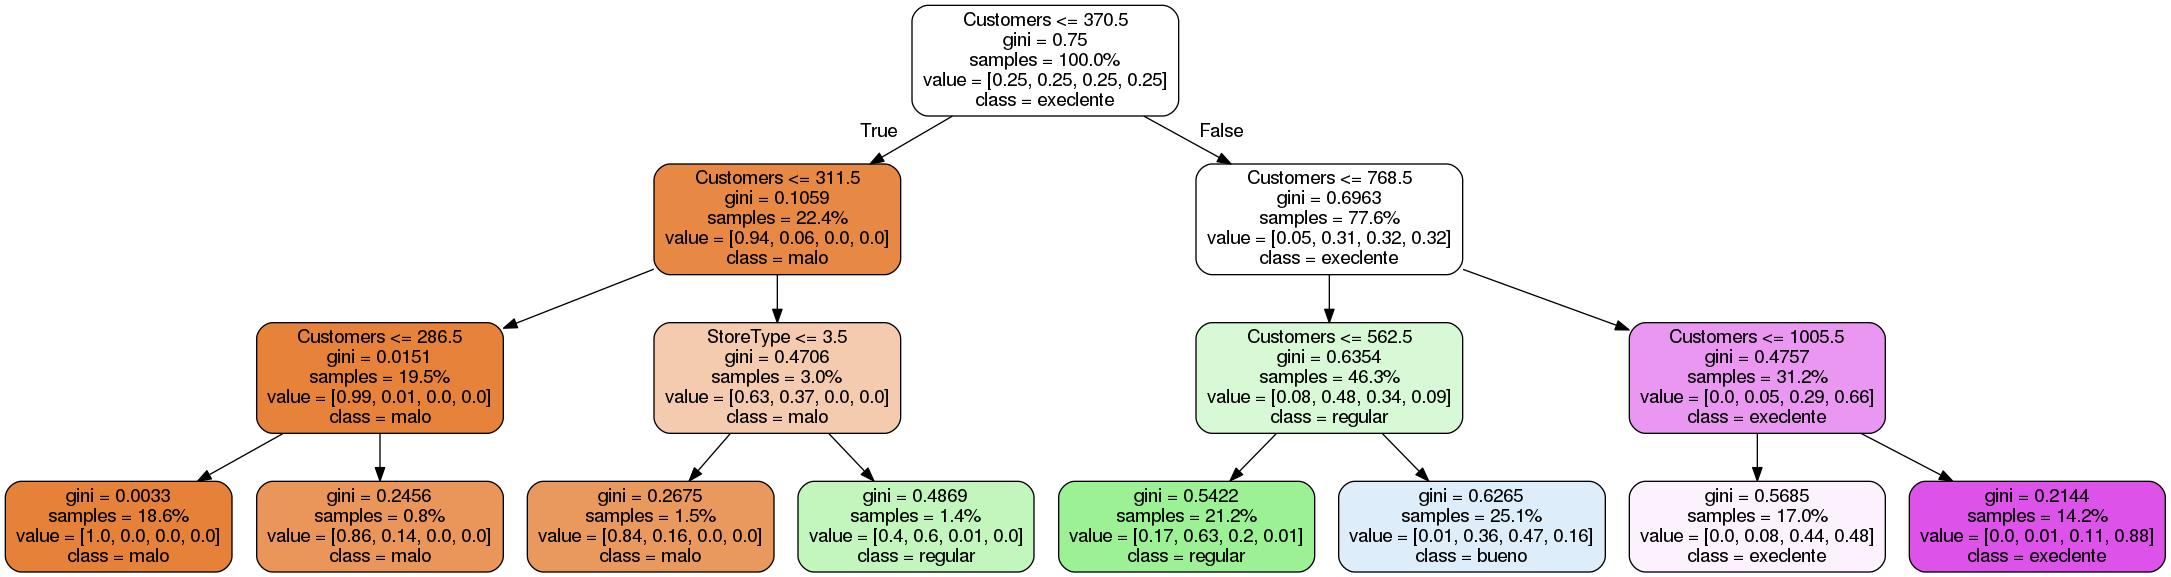

In [90]:
i #dot -Tpng tree.dot -o tree.png

<hr><h1>Random Forest</h1><hr>

In [10]:
clf=RandomForestClassifier(n_estimators=50)

In [11]:
clf = clf.fit(temporal_x, temporal_y)

Matriz de confunsio no normalizada
[[23733  1446     6     3]
 [ 1248 20837  3497   103]
 [   10  3721 18584  3060]
 [    5   137  3326 22005]]


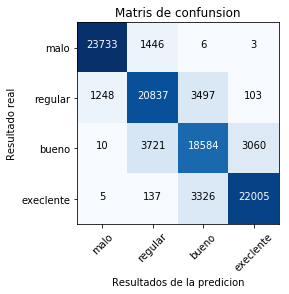

Porcentaje total de los aciertos 
0.837182096126


(0.83718209612567707, 0.16281790387432291)

In [12]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matriz de confunsion')


<hr><h1>Redes neuronal</h1><hr>

In [18]:
from sklearn.neural_network import MLPClassifier

In [39]:
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=50)

In [40]:
clf = clf.fit(temporal_x, temporal_y)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Matriz de confunsio no normalizada
[[21381  3735    48    24]
 [ 1036 21445  3033   171]
 [    6 10833 12682  1854]
 [    2  1703  8835 14933]]


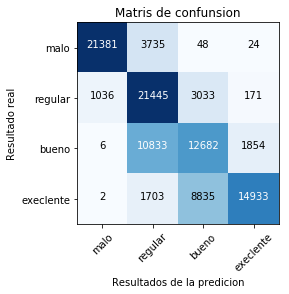

Porcentaje total de los aciertos 
0.692492209082


(0.69249220908170384, 0.30750779091829611)

In [42]:
y_true = tar_test.values
y_pred = clf.predict(pred_test)
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matriz de confunsion')

<hr><h1>Linear regression</h1><hr>

In [25]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf = clf.fit(temporal_x, temporal_y)
y_true = tar_test.values
y_pred = clf.predict(pred_test)

In [32]:
y_pred2=[]
for x in y_pred:
    y_pred2.append(round(x))

Matriz de confunsio no normalizada
[[17089  7773   326     0]
 [    0 15408 10204    73]
 [    0  3266 21825   255]
 [    0   159 17997  5488]]


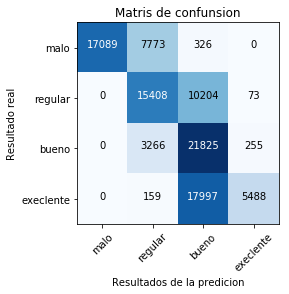

Porcentaje total de los aciertos 
0.598920521114


(0.59892052111392613, 0.40107947888607393)

In [33]:
cnf_matrix = confusion_matrix(y_true, y_pred2, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matriz de confunsion')

<hr><h1>Bayes</h1><hr>

In [92]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(temporal_x, temporal_y)
y_true = tar_test.values
y_pred = clf.predict(pred_test)

Matriz de confunsio no normalizada
[[18239  6873    64    12]
 [    3 21424  4100   158]
 [    0 10168 13305  1902]
 [    1  1417 10720 13335]]


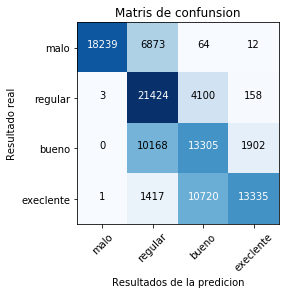

Porcentaje total de los aciertos 
0.651812310142


(0.65181231014244845, 0.34818768985755155)

In [93]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matriz de confunsion')